Follow up notebook that describes how accurately prophet predicted several weeks of website traffic.
Full article is [here](http://pbpython.com/prophet-accuracy.html)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
plt.style.use('ggplot')

In [3]:
proj = pd.read_excel('https://github.com/chris1610/pbpython/blob/master/data/March-2017-forecast-article.xlsx?raw=True')

Look at the prediction (aka yhat) values

In [4]:
proj[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2014-09-25,3.294797,2.770241,3.856544
1,2014-09-26,3.129766,2.564662,3.677923
2,2014-09-27,3.152004,2.577474,3.670529
3,2014-09-28,3.659615,3.112663,4.191708
4,2014-09-29,3.823493,3.279714,4.376206


Convert the values from log format and filter for the right daterange

In [5]:
proj["Projected_Sessions"] = np.exp(proj.yhat).round()
proj["Projected_Sessions_lower"] = np.exp(proj.yhat_lower).round()
proj["Projected_Sessions_upper"] = np.exp(proj.yhat_upper).round()

final_proj = proj[(proj.ds > "3-5-2017") & 
                  (proj.ds < "5-20-2017")][["ds", "Projected_Sessions_lower", 
                                            "Projected_Sessions", "Projected_Sessions_upper"]]

Read in the Google Analytics file

In [6]:
actual = pd.read_excel('Traffic_20170306-20170519.xlsx')
actual.columns = ["ds", "Actual_Sessions"]

In [7]:
actual.head()

,ds,Actual_Sessions
0,2017-03-06,2227
1,2017-03-07,2093
2,2017-03-08,2068
3,2017-03-09,2400
4,2017-03-10,1888


Combine the predictions and the merge

In [8]:
df = pd.merge(actual, final_proj)
df.head()

,ds,Actual_Sessions,Projected_Sessions_lower,Projected_Sessions,Projected_Sessions_upper
0,2017-03-06,2227,1427.0,2503.0,4289.0
1,2017-03-07,2093,1791.0,3194.0,5458.0
2,2017-03-08,2068,1162.0,1928.0,3273.0
3,2017-03-09,2400,1118.0,1886.0,3172.0
4,2017-03-10,1888,958.0,1642.0,2836.0


See how big the delta is between the prediction and actual

In [9]:
df["Session_Delta"] = df.Actual_Sessions - df.Projected_Sessions
df.Session_Delta.describe()

count      75.000000
mean      739.440000
std       711.001829
min     -1101.000000
25%       377.500000
50%       619.000000
75%       927.000000
max      4584.000000
Name: Session_Delta, dtype: float64

In [10]:
# Need to convert to just a date in order to keep plot from throwing errors
df['ds'] = df['ds'].dt.date

Quick Plot of the delta

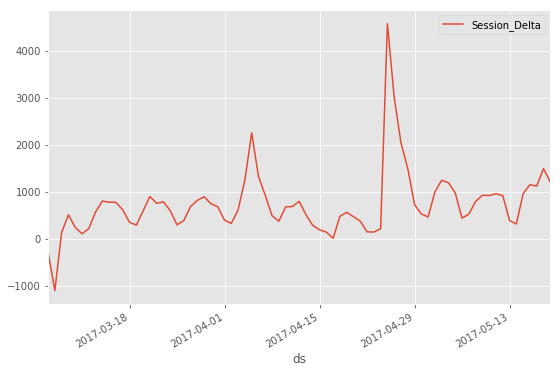

In [11]:
fig, ax = plt.subplots(figsize=(9, 6))
df.plot("ds", "Session_Delta", ax=ax)
fig.autofmt_xdate(bottom=0.2, rotation=30, ha='right');

More comprehensive plot showing the upper and lower bound

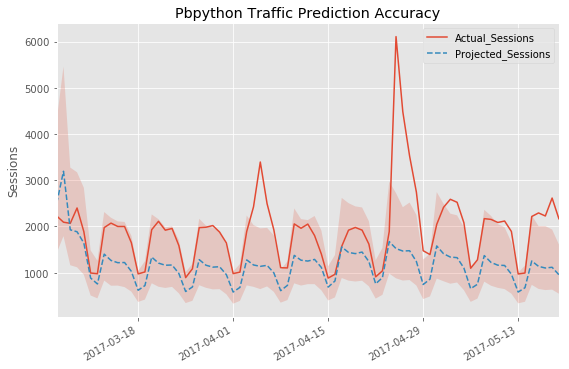

In [12]:
fig, ax = plt.subplots(figsize=(9, 6))
df.plot(kind='line', x='ds', y=['Actual_Sessions', 'Projected_Sessions'], ax=ax, style=['-','--'])
ax.fill_between(df['ds'].values, df['Projected_Sessions_lower'], df['Projected_Sessions_upper'], alpha=0.2)
ax.set(title='Pbpython Traffic Prediction Accuracy', xlabel='', ylabel='Sessions')
fig.autofmt_xdate(bottom=0.2, rotation=30, ha='right')